## History and Applications

#### What are the popular applications of Deep Learning?
1. Natural Language Processing 
2. Computer Vision
3. Making Music
4. Generating Texts
6. Playing games 
.
.
.


##### Neural Network - The basic bulding block for Deep Learning

## Technology Stack

**Compute:**  Azure [DSVM](https://docs.microsoft.com/en-us/azure/machine-learning/data-science-virtual-machine/overview)

**Language:** [Python (Anaconda)](https://docs.anaconda.com/anaconda/)

**Library:** [Keras](https://keras.io/) with [Tensorflow](https://www.tensorflow.org/get_started/eager) backend

**Data Set:**  MNIST (Hand Written digit Recognition)
              The original dataset was constructed by [Yann LeCun](http://yann.lecun.com/exdb/mnist/)
              The Dataset used in this demo is from Kaggle [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer/data)

## MNIST Classifer using Keras

In [2]:
# import libraries
import numpy as np # 
import pandas as pd # 
%matplotlib inline

### How does the data look like

In [3]:
# load the training data and inspect
digits = pd.read_csv('C:/Users/anubrata/Pictures/MNIST/train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# let's look at the structure of one row (image)
a = digits.iloc[3,1:].values ## integer-location based indexing for selection by position
print("shape of a", a.shape)
b = a.reshape((28,28))
print("shape of b", b.shape)
print(b)

shape of a (784,)
shape of b (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 220 179   6   0   0   0   0   0   0   0   0   9
   77   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  28 247  17   0   0   0   0   0   0   0   0  27
  202   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 242 155   0   0   0   0   0   0   0   0  27
  254  63   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 

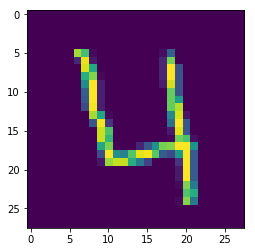

In [5]:
# plot one of the images
import matplotlib.pyplot as plt
plt.imshow(b)

In [6]:
# split the training data into predictors (X) and targets (y)
X=digits.iloc[:,1:].values
y=digits.iloc[:,0].values
print("labels", y)
print(X[1])
X=np.divide(X,255.)
print(X[1])

labels [1 0 1 ... 7 6 9]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 2

In [7]:
y.shape

(42000,)

In [8]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
print("shapre", y.shape)
print(y[:9])

shapre (42000, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers

### The Model

In [14]:
model = Sequential() ## Initializes a Model
model.add(Dense(100,activation='relu',input_shape=(784,))) # Creates the first layer
model.add(Dense(15,activation='relu')) # Creates the second layer
model.add(Dense(10,activation='sigmoid'))

## SGD - Stochastic Gradient Descent 
## categorical_crossentropy - Calculates loss for Categorical Targets

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy']) 

# the EarlyStopping stops the model training if it does not improve after 5 epochs
history=model.fit(X,y,validation_split=0.3,callbacks=[EarlyStopping(patience=5)],epochs=50)


Train on 29399 samples, validate on 12601 samples
Epoch 1/50
29399/29399 [==============================] - 23s 766us/step - loss: 1.7008 - acc: 0.4528 - val_loss: 0.7026 - val_acc: 0.8264
Epoch 2/50
29399/29399 [==============================] - 3s 107us/step - loss: 0.4894 - acc: 0.8659 - val_loss: 0.3950 - val_acc: 0.8853
Epoch 3/50
29399/29399 [==============================] - 3s 109us/step - loss: 0.3562 - acc: 0.8982 - val_loss: 0.3321 - val_acc: 0.9034
Epoch 4/50
29399/29399 [==============================] - 3s 108us/step - loss: 0.3074 - acc: 0.9113 - val_loss: 0.2962 - val_acc: 0.9105
Epoch 5/50
29399/29399 [==============================] - 3s 108us/step - loss: 0.2765 - acc: 0.9199 - val_loss: 0.2633 - val_acc: 0.9223
Epoch 6/50
29399/29399 [==============================] - 3s 108us/step - loss: 0.2520 - acc: 0.9274 - val_loss: 0.2490 - val_acc: 0.9255
Epoch 7/50
29399/29399 [==============================] - 3s 110us/step - loss: 0.2317 - acc: 0.9330 - val_loss: 0.2330 -

### Architecture 

In [34]:
#print(model.summary())

print(model.layers)
print(model.outputs)

[<keras.layers.core.Dense object at 0x000001C7A7CA77F0>, <keras.layers.core.Dense object at 0x000001C7A7CA7898>, <keras.layers.core.Dense object at 0x000001C7A7CA7D30>]
[<tf.Tensor 'dense_3/Sigmoid:0' shape=(?, 10) dtype=float32>]


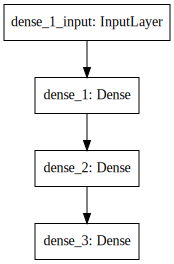

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Explanation


"Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True)."

### How did it do

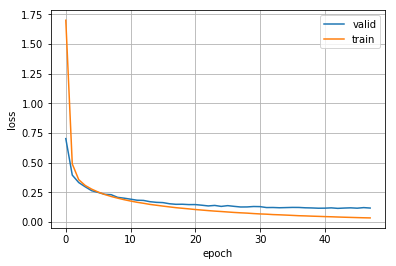

In [36]:
# plot loss vs # model epochs trained
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['valid','train'])

Text(0,0.5,'accuracy')

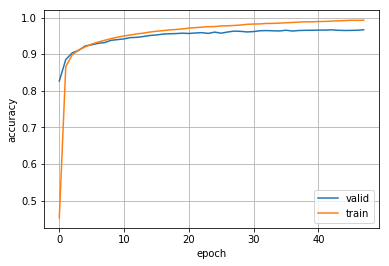

In [37]:
# plot accuracy vs # epochs
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['valid','train'])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Reference: Kaggle https://www.kaggle.com/andypicke/introduction-to-deep-learning-with-keras 